In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [124]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

# Check NaN values

In [4]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

# Remove Null Columns and Subsample Data

In [129]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=.3, replace=True, random_state=1)

# Check Distribution of dropped calories column

In [77]:
raw_data.calories.describe()

count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64

# Begin SVC by defining 5 classes

In [130]:
Y = np.floor(Y)
Y.unique()

array([3., 4., 5., 1., 0., 2.])

# Use SVM classifier with one vs rest decision function

In [131]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr')

# Fit Data to Results

In [132]:
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Plot below shows significan class overlap for classes 2,3, 4 and 5

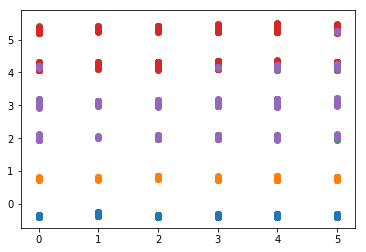

In [133]:
clf.decision_function_shape = "ovr"
plt.scatter(Y, clf.decision_function(X)[:,1])
plt.scatter(Y,clf.decision_function(X)[:,2])
plt.scatter(Y,clf.decision_function(X)[:,3])
plt.scatter(Y,clf.decision_function(X)[:,4])
plt.scatter(Y,clf.decision_function(X)[:,5])

# Perform 10 Fold Cross Validation on SVC

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, Y, cv=10)

array([0.44958678, 0.41956882, 0.42358804, 0.43023256, 0.44093178,
       0.43760399, 0.45590682, 0.44592346, 0.45      , 0.45166667])

# Perform Dimensionality Reduction Using PCA for 30 Features

In [73]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
X_sklearn = sklearn_pca.fit_transform(X)

# Perform Cross Validation on Transformed Input

In [74]:
cross_val_score(clf, X_sklearn, Y, cv=5)

array([0.42703151, 0.42857143, 0.4081463 , 0.42928453, 0.44379684])

# Drop Null rows and keep perviously discarded columns to determine whether    cross validated accuracy can be improved

In [113]:
raw_data1 = raw_data.dropna()
Z = raw_data1.drop(['title'],1).sample(frac=.3,replace=True,random_state=1)
YY = raw_data1.rating.sample(frac=.3,replace=True,random_state=1)

In [117]:
YY = np.floor(YY)

In [118]:
sklearn_pca = sklearnPCA(n_components=30)
Z_sklearn = sklearn_pca.fit_transform(Z)

# Use reduced input space to calculate new 10-fold cross validated scores

In [120]:
clf.fit(Z, YY)
cross_val_score(clf, Z_sklearn, YY, cv=5)

array([0.41194969, 0.3976915 , 0.41176471, 0.41052632, 0.40947368])

# No imporvement for new columns with 30 most significant features